In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [ ]:
# Membaca file
file_path = '/content/drive/MyDrive/Kuliah/Semester 6/Data Mining/Tukbes/tourism_with_id.csv'
data = pd.read_csv(file_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Understading dan Preparation**

In [ ]:
#Sekilas Dataset
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head()

Shape Of The Dataset : (437, 13)

Glimpse Of The Dataset :


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
# Cek Null Values
print(f"Null values of the Dataset :")
data.isna().sum().to_frame()

Null values of the Dataset :


,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [ ]:
#mengisi null values Time_Minutes
data['Time_Minutes'] = data['Time_Minutes'].fillna(data['Time_Minutes'].mean())

#drop Unnamed Collom 11 and 12
data_cleaned = data.drop(columns=['Unnamed: 11', 'Unnamed: 12'])

print(f"Null values of the Dataset :")
data_cleaned.isna().sum().to_frame()

Null values of the Dataset :


,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,0
Coordinate,0
Lat,0


In [ ]:
data_cleaned.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Cluster
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.000000,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,0
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.000000,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,1
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.000000,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,-1
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,82.609756,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,2
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.000000,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,-1


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  437 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


# **DBSCAN**

In [ ]:
# Menghapus kolom yang tidak diperlukan
data_cluster = data_cleaned.drop(columns=['Place_Id', 'Description', 'City', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'])

#Sekilas Dataset
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data_cluster.head()

Shape Of The Dataset : (437, 13)

Glimpse Of The Dataset :


,Place_Name,Category,Price,Rating
0,Monumen Nasional,Budaya,20000,4.6
1,Kota Tua,Budaya,0,4.6
2,Dunia Fantasi,Taman Hiburan,270000,4.6
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,10000,4.5
4,Atlantis Water Adventure,Taman Hiburan,94000,4.5


In [ ]:
# Menyiapkan data untuk clustering
X = data_cluster[['Price']]

# Melakukan clustering dengan DBSCAN
dbscan = DBSCAN(eps=1.3, min_samples=10, metric='euclidean')
data_cluster['Cluster'] = dbscan.fit_predict(X)

#Sekilas Dataset
print(f"Shape Of The Dataset : {data_cluster.shape}")
print(f"\nTSekilas Dataset :")
data_cluster.head(10)

Shape Of The Dataset : (437, 5)

TSekilas Dataset :


,Place_Name,Category,Price,Rating,Cluster
0,Monumen Nasional,Budaya,20000,4.6,0
1,Kota Tua,Budaya,0,4.6,1
2,Dunia Fantasi,Taman Hiburan,270000,4.6,-1
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,10000,4.5,2
4,Atlantis Water Adventure,Taman Hiburan,94000,4.5,-1
5,Taman Impian Jaya Ancol,Taman Hiburan,25000,4.5,3
6,Kebun Binatang Ragunan,Cagar Alam,4000,4.5,-1
7,Ocean Ecopark,Taman Hiburan,180000,4.0,-1
8,Pelabuhan Marina,Bahari,175000,4.4,-1
9,Pulau Tidung,Bahari,150000,4.5,-1


In [ ]:
# Menampilkan data untuk setiap cluster
clusters = data_cluster['Cluster'].unique()

for cluster in clusters:
    print(f"Cluster {cluster}")
    cluster_data = data_cluster[data_cluster['Cluster'] == cluster]
    display(cluster_data.head(100))
    print("\n")

Cluster 0


,Place_Name,Category,Price,Rating,Cluster
0,Monumen Nasional,Budaya,20000,4.6,0
75,Taman Cattleya,Taman Hiburan,20000,4.5,0
86,Sindu Kusuma Edupark (SKE),Taman Hiburan,20000,4.2,0
103,Tebing Breksi,Budaya,20000,4.4,0
131,Air Terjun Kedung Pedut,Cagar Alam,20000,4.5,0
136,Wisata Alam Kalibiru,Cagar Alam,20000,4.4,0
137,Jogja Exotarium,Taman Hiburan,20000,4.4,0
216,Kebun Binatang Bandung,Cagar Alam,20000,4.0,0
225,Kawasan Punclut,Taman Hiburan,20000,4.4,0
244,Jendela Alam,Taman Hiburan,20000,4.4,0




Cluster 1


,Place_Name,Category,Price,Rating,Cluster
1,Kota Tua,Budaya,0,4.6,1
14,Pasar Seni,Pusat Perbelanjaan,0,4.4,1
15,Jembatan Kota Intan,Budaya,0,4.3,1
21,Masjid Istiqlal,Tempat Ibadah,0,4.7,1
22,Gereja Katedral,Tempat Ibadah,0,4.8,1
...,...,...,...,...,...
345,Indonesia Kaya Park,Taman Hiburan,0,4.6,1
346,Taman Pandanaran,Taman Hiburan,0,4.4,1
351,GPIB Immanuel Semarang (Gereja Blenduk),Tempat Ibadah,0,4.6,1
352,Taman Srigunting,Taman Hiburan,0,4.7,1




Cluster -1


,Place_Name,Category,Price,Rating,Cluster
2,Dunia Fantasi,Taman Hiburan,270000,4.6,-1
4,Atlantis Water Adventure,Taman Hiburan,94000,4.5,-1
6,Kebun Binatang Ragunan,Cagar Alam,4000,4.5,-1
7,Ocean Ecopark,Taman Hiburan,180000,4.0,-1
8,Pelabuhan Marina,Bahari,175000,4.4,-1
...,...,...,...,...,...
393,Air Mancur Menari,Taman Hiburan,35000,4.4,-1
403,Kenjeran Park,Taman Hiburan,35000,4.2,-1
409,Ciputra Waterpark,Taman Hiburan,95000,4.3,-1
424,Waterpark Kenjeran Surabaya,Taman Hiburan,35000,4.1,-1




Cluster 2


,Place_Name,Category,Price,Rating,Cluster
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,10000,4.5,2
36,Bumi Perkemahan Cibubur,Taman Hiburan,10000,4.5,2
65,Museum Layang-layang,Budaya,10000,4.5,2
126,Blue Lagoon Jogja,Taman Hiburan,10000,4.3,2
129,Studio Alam Gamplong,Taman Hiburan,10000,4.4,2
133,Desa Wisata Gamplong,Taman Hiburan,10000,4.4,2
135,Grojogan Watu Purbo Bangunrejo,Taman Hiburan,10000,4.5,2
138,Puncak Gunung Api Purba - Nglanggeran,Cagar Alam,10000,4.7,2
145,Bukit Wisata Pulepayung,Cagar Alam,10000,4.5,2
152,Pantai Kukup,Bahari,10000,4.0,2




Cluster 3


,Place_Name,Category,Price,Rating,Cluster
5,Taman Impian Jaya Ancol,Taman Hiburan,25000,4.5,3
30,Wisata Alam Mangrove Angke,Cagar Alam,25000,4.3,3
55,Pantai Ancol,Bahari,25000,4.4,3
66,Margasatwa Muara Angke,Cagar Alam,25000,4.2,3
111,Bukit Bintang Yogyakarta,Taman Hiburan,25000,4.5,3
219,Dusun Bambu,Taman Hiburan,25000,4.5,3
231,Bukit Moko,Cagar Alam,25000,4.5,3
252,Selasar Sunaryo Art Space,Taman Hiburan,25000,4.6,3
269,Bukit Bintang,Cagar Alam,25000,4.6,3
286,Puspa Iptek Sundial,Taman Hiburan,25000,4.4,3




Cluster 4


,Place_Name,Category,Price,Rating,Cluster
10,Pulau Bidadari,Bahari,5000,4.6,4
12,Pulau Pramuka,Bahari,5000,4.2,4
16,Museum Fatahillah,Budaya,5000,4.4,4
20,Museum Wayang,Budaya,5000,4.5,4
23,Museum Nasional,Budaya,5000,4.6,4
41,Museum Seni Rupa dan Kramik,Budaya,5000,4.4,4
47,Taman Ismail Marzuki,Budaya,5000,4.6,4
52,Rumah Sipitung,Budaya,5000,4.5,4
59,Museum Tekstil,Budaya,5000,4.5,4
72,Museum Perangko,Budaya,5000,4.4,4




Cluster 5


,Place_Name,Category,Price,Rating,Cluster
17,Museum Bank Indonesia,Budaya,2000,4.7,5
19,Museum Taman Prasasti,Budaya,2000,4.5,5
40,Museum Bahari Jakarta,Budaya,2000,4.4,5
49,Museum Joang 45,Budaya,2000,4.0,5
58,Museum Sumpah Pemuda,Budaya,2000,4.7,5
62,Museum Kebangkitan Nasional,Budaya,2000,4.7,5
63,Museum Sasmita Loka Ahmad Yani,Budaya,2000,4.7,5
128,Bukit Lintang Sewu,Taman Hiburan,2000,4.5,5
142,Seribu Batu Songgo Langit,Cagar Alam,2000,4.6,5
164,Green Village Gedangsari,Taman Hiburan,2000,4.2,5




Cluster 6


,Place_Name,Category,Price,Rating,Cluster
51,Kampung Cina,Budaya,15000,4.5,6
85,Keraton Yogyakarta,Budaya,15000,4.6,6
96,Monumen Yogya Kembali,Budaya,15000,4.5,6
97,Taman Pelangi Yogyakarta,Taman Hiburan,15000,4.3,6
114,Monumen Sanapati,Budaya,15000,4.3,6
191,Air Terjun Sri Gethuk,Cagar Alam,15000,4.4,6
206,Heha Sky View,Taman Hiburan,15000,4.4,6
214,Taman Hutan Raya Ir. H. Djuanda,Cagar Alam,15000,4.5,6
218,Tebing Karaton,Cagar Alam,15000,4.5,6
234,Gua Belanda,Cagar Alam,15000,4.4,6




Cluster 7


,Place_Name,Category,Price,Rating,Cluster
70,Cibubur Garden Diary (Cibugary),Cagar Alam,50000,4.5,7
88,De Mata Museum Jogja,Budaya,50000,4.4,7
120,Candi Prambanan,Budaya,50000,4.7,7
169,Candi Borobudur,Budaya,50000,4.7,7
192,Candi Sewu,Budaya,50000,4.6,7
204,Desa Wisata Tembi,Taman Hiburan,50000,4.5,7
224,Orchid Forest Cikole,Taman Hiburan,50000,4.6,7
230,The Great Asia Africa,Taman Hiburan,50000,4.4,7
238,Lembang Park & Zoo,Cagar Alam,50000,4.5,7
247,NuArt Sculpture Park,Taman Hiburan,50000,4.7,7




Cluster 8


,Place_Name,Category,Price,Rating,Cluster
87,Museum Benteng Vredeburg Yogyakarta,Budaya,3000,4.6,8
108,Hutan Pinus Pengger,Taman Hiburan,3000,4.5,8
109,Monumen Serangan Umum 1 Maret,Taman Hiburan,3000,4.6,8
110,Puncak Pinus Becici,Taman Hiburan,3000,4.5,8
140,Bunker Kaliadem Merapi,Cagar Alam,3000,4.5,8
148,Goa Cerme,Cagar Alam,3000,4.4,8
195,Pantai Ngrenehan,Bahari,3000,4.4,8
209,Pantai Congot,Bahari,3000,4.3,8
227,Museum Sri Baduga,Budaya,3000,4.5,8
336,Kampung Pelangi,Taman Hiburan,3000,4.3,8


In [ ]:
#print 1 cluster
data_cluster[data_cluster['Cluster'] == -1]

#cari data harga spesifik pada cluster -1
data_cluster[data_cluster['Cluster'] == -1]['Price'].unique()

array([270000,  94000,   4000, 180000, 175000, 150000, 900000, 185000,
       115000,  35000, 110000, 100000,  70000,  40000,  12000,  30000,
         1000, 300000, 200000,   6000,  60000,   7000,   2500,  22000,
       250000, 500000, 220000,  75000,   8000, 280000,  81000,  45000,
         7500, 375000,  11000,  23000,  80000,   9000,   5500,  95000,
       125000])

In [ ]:
# melihat total cluster
data_cluster['Cluster'].value_counts().sort_index (ascending=True)

Cluster
-1     94
 0     16
 1    137
 2     52
 3     15
 4     51
 5     14
 6     24
 7     19
 8     15
Name: count, dtype: int64

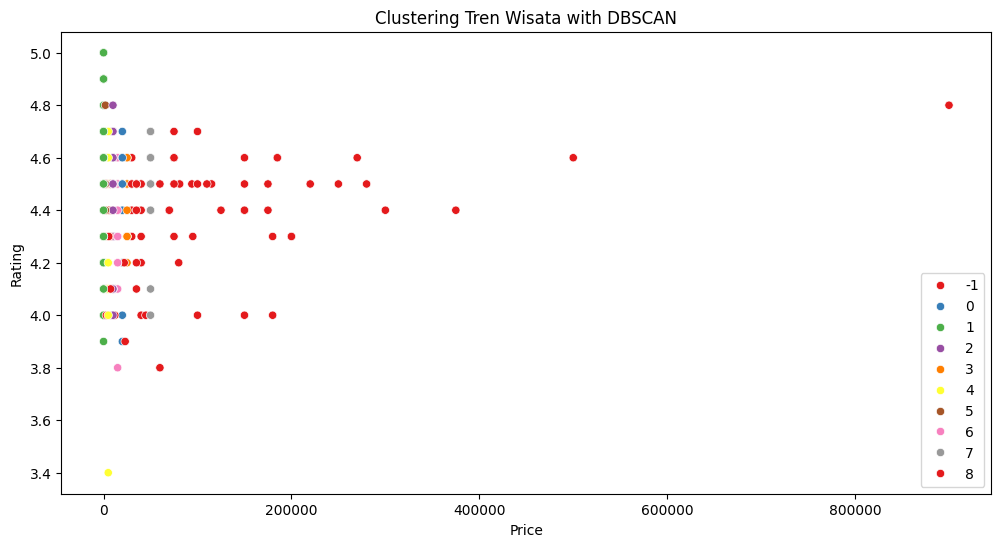

In [ ]:
# Visualisasi hasil clustering
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price', y='Rating', hue='Cluster', data=data_cluster, palette='Set1')
plt.title('Clustering Tren Wisata with DBSCAN')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend()
plt.show()

# **ANALISIS TREN**

In [ ]:
# Menambahkan colom Cluster di data_cluster ke data
data_cleaned['Cluster'] = data_cluster['Cluster']
data_recomendation = data_cleaned.copy()

# Menentukan Top 5 tempat wisata berdasarkan rating di setiap cluster
top_5_places = data_recomendation.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Rating')).reset_index(drop=True)

# Visualisasi Top 5 tempat wisata di setiap cluster
print("Top 5 Tempat Wisata yang sedan Tren untuk setiap cluster")
for cluster in top_5_places['Cluster'].unique():
    print(f"\nTop 5 Tempat Wisata yang sedan Tren di Cluster {cluster}:")
    display(top_5_places[top_5_places['Cluster'] == cluster][['Place_Name', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes']])

Top 5 Tempat Wisata yang sedan Tren untuk setiap cluster

Top 5 Tempat Wisata yang sedan Tren di Cluster -1:


,Place_Name,Category,City,Price,Rating,Time_Minutes
0,Pulau Pelangi,Bahari,Jakarta,900000,4.8,82.609756
1,Wisata Kraton Jogja,Budaya,Yogyakarta,7000,4.7,82.609756
2,Museum Ullen Sentalu,Budaya,Yogyakarta,100000,4.7,120.000000
3,Saung Angklung Mang Udjo,Budaya,Bandung,75000,4.7,82.609756
4,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6,360.000000



Top 5 Tempat Wisata yang sedan Tren di Cluster 0:


,Place_Name,Category,City,Price,Rating,Time_Minutes
5,Pura Giri Natha,Budaya,Semarang,20000,4.7,82.609756
6,Monumen Nasional,Budaya,Jakarta,20000,4.6,15.000000
7,Rainbow Garden,Cagar Alam,Bandung,20000,4.6,90.000000
8,Taman Cattleya,Taman Hiburan,Jakarta,20000,4.5,82.609756
9,Air Terjun Kedung Pedut,Cagar Alam,Yogyakarta,20000,4.5,60.000000



Top 5 Tempat Wisata yang sedan Tren di Cluster 1:


,Place_Name,Category,City,Price,Rating,Time_Minutes
10,Wisata Kuliner Pecenongan,Pusat Perbelanjaan,Jakarta,0,5.0,82.609756
11,Freedom Library,Budaya,Jakarta,0,5.0,82.609756
12,Desa Wisata Sungai Code Jogja Kota,Taman Hiburan,Yogyakarta,0,5.0,82.609756
13,Kauman Pakualaman Yogyakarta,Budaya,Yogyakarta,0,5.0,82.609756
14,Masjid Daarut Tauhiid Bandung,Tempat Ibadah,Bandung,0,4.9,82.609756



Top 5 Tempat Wisata yang sedan Tren di Cluster 2:


,Place_Name,Category,City,Price,Rating,Time_Minutes
15,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Surabaya,10000,4.8,82.609756
16,Puncak Gunung Api Purba - Nglanggeran,Cagar Alam,Yogyakarta,10000,4.7,60.000000
17,Pantai Timang,Bahari,Yogyakarta,10000,4.7,90.000000
18,Curug Aseupan,Cagar Alam,Bandung,10000,4.7,82.609756
19,Kampoeng Djadhoel Semarang,Budaya,Semarang,10000,4.7,82.609756



Top 5 Tempat Wisata yang sedan Tren di Cluster 3:


,Place_Name,Category,City,Price,Rating,Time_Minutes
20,Selasar Sunaryo Art Space,Taman Hiburan,Bandung,25000,4.6,82.609756
21,Bukit Bintang,Cagar Alam,Bandung,25000,4.6,82.609756
22,Taman Impian Jaya Ancol,Taman Hiburan,Jakarta,25000,4.5,10.000000
23,Bukit Bintang Yogyakarta,Taman Hiburan,Yogyakarta,25000,4.5,90.000000
24,Dusun Bambu,Taman Hiburan,Bandung,25000,4.5,82.609756



Top 5 Tempat Wisata yang sedan Tren di Cluster 4:


,Place_Name,Category,City,Price,Rating,Time_Minutes
25,"Bukit Paralayang, Watugupit",Cagar Alam,Yogyakarta,5000,4.7,90.000000
26,Museum Sepuluh Nopember Kota Surabaya,Budaya,Surabaya,5000,4.7,82.609756
27,Pulau Bidadari,Bahari,Jakarta,5000,4.6,82.609756
28,Museum Nasional,Budaya,Jakarta,5000,4.6,82.609756
29,Taman Ismail Marzuki,Budaya,Jakarta,5000,4.6,82.609756



Top 5 Tempat Wisata yang sedan Tren di Cluster 5:


,Place_Name,Category,City,Price,Rating,Time_Minutes
30,Gua Maria Kerep Ambarawa,Cagar Alam,Semarang,2000,4.8,82.609756
31,Museum Bank Indonesia,Budaya,Jakarta,2000,4.7,82.609756
32,Museum Sumpah Pemuda,Budaya,Jakarta,2000,4.7,82.609756
33,Museum Kebangkitan Nasional,Budaya,Jakarta,2000,4.7,45.000000
34,Museum Sasmita Loka Ahmad Yani,Budaya,Jakarta,2000,4.7,45.000000



Top 5 Tempat Wisata yang sedan Tren di Cluster 6:


,Place_Name,Category,City,Price,Rating,Time_Minutes
35,Keraton Yogyakarta,Budaya,Yogyakarta,15000,4.6,82.609756
36,Curug Cimahi,Cagar Alam,Bandung,15000,4.6,30.000000
37,Kampung Cina,Budaya,Jakarta,15000,4.5,82.609756
38,Monumen Yogya Kembali,Budaya,Yogyakarta,15000,4.5,30.000000
39,Taman Hutan Raya Ir. H. Djuanda,Cagar Alam,Bandung,15000,4.5,90.000000



Top 5 Tempat Wisata yang sedan Tren di Cluster 7:


,Place_Name,Category,City,Price,Rating,Time_Minutes
40,Candi Prambanan,Budaya,Yogyakarta,50000,4.7,82.609756
41,Candi Borobudur,Budaya,Yogyakarta,50000,4.7,120.000000
42,NuArt Sculpture Park,Taman Hiburan,Bandung,50000,4.7,82.609756
43,Wot Batu,Cagar Alam,Bandung,50000,4.7,82.609756
44,Candi Sewu,Budaya,Yogyakarta,50000,4.6,82.609756



Top 5 Tempat Wisata yang sedan Tren di Cluster 8:


,Place_Name,Category,City,Price,Rating,Time_Minutes
45,Museum Benteng Vredeburg Yogyakarta,Budaya,Yogyakarta,3000,4.6,120.000000
46,Monumen Serangan Umum 1 Maret,Taman Hiburan,Yogyakarta,3000,4.6,82.609756
47,Hutan Pinus Pengger,Taman Hiburan,Yogyakarta,3000,4.5,82.609756
48,Puncak Pinus Becici,Taman Hiburan,Yogyakarta,3000,4.5,82.609756
49,Bunker Kaliadem Merapi,Cagar Alam,Yogyakarta,3000,4.5,45.000000


In [ ]:
# Analyze and summarize the results
summary = []
for cluster in top_5_places['Cluster'].unique():
    data_recomendation = top_5_places[top_5_places['Cluster'] == cluster]
    dominant_category = data_recomendation['Category'].mode()[0]
    dominant_city = data_recomendation['City'].mode()[0]
    price_range = (data_recomendation['Price'].min(), data_recomendation['Price'].max())
    duration_range = (data_recomendation['Time_Minutes'].min(), data_recomendation['Time_Minutes'].max())
    highest_rating = data_recomendation['Rating'].max()
    summary.append({
        'Cluster': cluster,
        'Dominant_Category': dominant_category,
        'Dominant_City': dominant_city,
        'Price_Range': price_range,
        'Highest_Rating': highest_rating,
        'Duration_Range': duration_range
    })

summary_df = pd.DataFrame(summary)
print("\nSummary of Clusters:")
display(summary_df)


Summary of Clusters:


,Cluster,Dominant_Category,Dominant_City,Price_Range,Highest_Rating,Duration_Range
0,-1,Budaya,Jakarta,"(7000, 900000)",4.8,"(82.60975609756098, 360.0)"
1,0,Budaya,Jakarta,"(20000, 20000)",4.7,"(15.0, 90.0)"
2,1,Budaya,Jakarta,"(0, 0)",5.0,"(82.60975609756098, 82.60975609756098)"
3,2,Cagar Alam,Yogyakarta,"(10000, 10000)",4.8,"(60.0, 90.0)"
4,3,Taman Hiburan,Bandung,"(25000, 25000)",4.6,"(10.0, 90.0)"
5,4,Budaya,Jakarta,"(5000, 5000)",4.7,"(82.60975609756098, 90.0)"
6,5,Budaya,Jakarta,"(2000, 2000)",4.8,"(45.0, 82.60975609756098)"
7,6,Budaya,Bandung,"(15000, 15000)",4.6,"(30.0, 90.0)"
8,7,Budaya,Yogyakarta,"(50000, 50000)",4.7,"(82.60975609756098, 120.0)"
9,8,Taman Hiburan,Yogyakarta,"(3000, 3000)",4.6,"(45.0, 120.0)"


#### Cluster 0:
* Kategori: Budaya, Cagar Alam.
*Harga Tiket: 20.000.
*List item
*Rating: 4.5 hingga 4.7.
*Kota: Semarang, Jakarta, Bandung, Yogyakarta.
*Durasi Kunjungan: 60 hingga 90 menit.
*Kesimpulan:
  Tempat wisata dengan harga sedang dan rating tinggi.
  Cocok untuk wisatawan yang mencari pengalaman berkualitas dengan harga yang wajar.
  
#### Cluster 1:
* Kategori: Pusat Perbelanjaan, Budaya, Taman Hiburan, Tempat Ibadah.
*Harga Tiket: Gratis.
*Rating: 4.8 hingga 5.0.
*Kota: Jakarta, Yogyakarta, Bandung.
*Durasi Kunjungan: 82.6 menit.
*Kesimpulan:
*Tempat wisata gratis dengan rating sangat tinggi.
Cocok untuk wisatawan yang mencari tempat wisata berkualitas tanpa mengeluarkan biaya.

#### Cluster 2:
* Kategori: Tempat Ibadah, Cagar Alam, Bahari.
*Harga Tiket: 10.000.
*Rating: 4.7 hingga 4.8.
*Kota: Surabaya, Yogyakarta, Semarang.
*Durasi Kunjungan: 82.6 menit.
*Kesimpulan:
Tempat wisata dengan harga variatif dan rating tinggi.
Cocok untuk wisatawan yang mencari berbagai jenis pengalaman wisata dengan kualitas tinggi.


#### Cluster 3:
* Kategori: Taman Hiburan, Cagar Alam.
*Harga Tiket: 25.000.
*Rating: 4.5 hingga 4.6.
*Kota: Bandung, Yogyakarta.
*Durasi Kunjungan: 82.6 menit.
*Kesimpulan:
Tempat wisata dengan harga sedang dan rating tinggi.
Cocok untuk wisatawan yang mencari tempat wisata yang berkualitas dengan harga terjangkau.

#### Cluster 4:
* Kategori: Cagar Alam, Budaya, Bahari.
*Harga Tiket: 5.000.
*Rating: 4.5 hingga 4.7.
*Kota: Yogyakarta, Surabaya, Jakarta.
*Durasi Kunjungan: 82.6 menit hingga 90 menit.
*Kesimpulan:
Tempat wisata dengan harga variatif dan rating tinggi.
Cocok untuk wisatawan yang mencari pengalaman wisata yang berkualitas dengan berbagai pilihan harga.


#### Cluster 5:
* Kategori: Cagar Alam, Budaya.
*Harga Tiket: 2.000.
*Rating: 4.7 hingga 4.8.
*Kota: Semarang, Jakarta.
*Durasi Kunjungan: 45 menit hingga 82.6 menit.
*Kesimpulan:
Tempat wisata dengan harga sangat murah dan rating sangat tinggi.
Cocok untuk wisatawan yang mencari pengalaman wisata berkualitas dengan harga sangat terjangkau.


#### Cluster 6:
* Kategori: Budaya, Cagar Alam.
*Harga Tiket: 15.000.
*Rating: 4.5 hingga 4.6.
*Kota: Yogyakarta, Bandung.
*Durasi Kunjungan: 30 menit hingga 90 menit.
*Kesimpulan:
Tempat wisata dengan harga sedang dan rating tinggi.
Cocok untuk wisatawan yang mencari pengalaman wisata yang berkualitas dengan harga terjangkau.

#### Cluster 7:
* Kategori: Budaya, Taman Hiburan.
*Harga Tiket: 50.000.
*Rating: 4.6 hingga 4.7.
*Kota: Yogyakarta, Bandung.
*Durasi Kunjungan: 82.6 menit hingga 120 menit.
*Kesimpulan:
Tempat wisata dengan harga tinggi dan rating sangat tinggi.
Cocok untuk wisatawan yang mencari pengalaman wisata berkualitas dengan harga yang lebih tinggi.


#### Cluster 8:
* Kategori: Budaya, Taman Hiburan, Cagar Alam.
*Harga Tiket: 3.000.
*Rating: 4.5 hingga 4.6.
*Kota: Yogyakarta.
*Durasi Kunjungan: 45 menit hingga 120 menit.
*Kesimpulan:
Tempat wisata dengan harga murah dan rating tinggi.
Cocok untuk wisatawan yang mencari pengalaman wisata berkualitas dengan harga yang sangat terjangkau.